In [1]:

# from utils import fix_pythonpath_if_working_locally

# fix_pythonpath_if_working_locally()

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from darts.models import Prophet
import plotly.express as px
from datetime import datetime


from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)
from darts.models import ExponentialSmoothing
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

In [2]:
RNA_Conc = pd.read_csv("https://raw.githubusercontent.com/biobotanalytics/covid19-wastewater-data/master/wastewater_by_county.csv")
Covid_Rate = pd.read_csv("https://raw.githubusercontent.com/biobotanalytics/covid19-wastewater-data/master/cases_by_county.csv")
Sale_to_List_table = pd.read_csv("Sales_to_List.csv")
SDU = pd.read_excel("Carlsbad_San_Diego_Unemployment.xlsx")
SanDiego_Employment = pd.read_csv("SDUT.csv", parse_dates=True, infer_datetime_format=True)

In [40]:
# Covid Cases and RNA level Processing


# Isolated counties Covid Cases
Covid_Rate.loc[Covid_Rate["name"] == "Miami-Dade County, FL"]
Sandy = Covid_Rate.loc[Covid_Rate["name"] == 'San Diego County, CA']
Miami_cases2 = Covid_Rate.loc[Covid_Rate["name"] == "Miami-Dade County, FL"]

# Isolated counties RNA 
Miami_RNA = RNA_Conc.loc[RNA_Conc['name'] == "Miami-Dade County, FL"]
Sandy_RNA =  RNA_Conc.loc[RNA_Conc['name'] == "San Diego County, CA"]

# Isolated by year
Miami_2020_cases = Miami_cases2.loc[pd.to_datetime(Miami_cases2['date']).dt.year == 2020]
Sandy_2020_cases = Sandy.loc[pd.to_datetime(Sandy['date']).dt.year == 2020]

# added week column
Miami_2020_cases.insert(2, "week", pd.to_datetime(Miami_2020_cases['date']).dt.week, True)
Sandy_2020_cases.insert(2, "week", pd.to_datetime(Sandy['date']).dt.week, True)

# group by and sum
Miami_test_2020 = Miami_2020_cases.groupby(by = "week").sum()
Sandy_2020_cases = Sandy_2020_cases.groupby(by = "week").sum()


# insert year
Miami_RNA.insert(2, "year", pd.to_datetime(Miami_RNA['sampling_week']).dt.year, True)
Sandy_RNA.insert(2, "year", pd.to_datetime(Sandy_RNA['sampling_week']).dt.year, True)


# RNA by year 2020
RNA_2020 = Miami_RNA.loc[Miami_RNA["year"] == 2020]
RNA_2020.insert(2, "week", pd.to_datetime(RNA_2020['sampling_week']).dt.week, True)

Sandy_RNA_2020 = Sandy_RNA.loc[Sandy_RNA["year"] == 2020]
Sandy_RNA_2020.insert(2, "week", pd.to_datetime(Sandy_RNA_2020['sampling_week']).dt.week, True)


#Merge for 2020
Cases_and_RNA = RNA_2020.merge(Miami_test_2020, how='inner', on='week')
Cases_and_RNA["Month"] = pd.to_datetime(Cases_and_RNA.sampling_week).dt.to_period('M')
Cases_and_RNA = Cases_and_RNA.drop(columns = "sampling_week")
Cases_and_RNA = Cases_and_RNA.drop(columns = "Unnamed: 0_x")
Cases_and_RNA = Cases_and_RNA.drop(columns = "Unnamed: 0_y")
Cases_and_RNA = Cases_and_RNA.drop(columns = ["fipscode_x", "fipscode_y"])

Sandy_Cases_and_RNA = Sandy_RNA_2020.merge(Sandy_2020_cases, how='inner', on='week')

# cases by year

Miami_2021_cases = Miami_cases2.loc[pd.to_datetime(Miami_cases2['date']).dt.year == 2021]
Miami_2021_cases.insert(2, "week", pd.to_datetime(Miami_2021_cases['date']).dt.week, True)
Miami_test_2021 = Miami_2021_cases.groupby(by = "week").sum()

Sandy_2021_cases = Sandy.loc[pd.to_datetime(Sandy['date']).dt.year == 2021]
Sandy_2021_cases.insert(2, "week", pd.to_datetime(Sandy_2021_cases['date']).dt.week, True)
Sandy_test_2021 = Sandy_2021_cases.groupby(by = "week").sum()

Sandy_2022_cases = Sandy.loc[pd.to_datetime(Sandy['date']).dt.year == 2022]
Sandy_2022_cases.insert(2, "week", pd.to_datetime(Sandy_2022_cases['date']).dt.week, True)
Sandy_test_2022 = Sandy_2022_cases.groupby(by = "week").sum()

Miami_2022_cases = Miami_cases2.loc[pd.to_datetime(Miami_cases2['date']).dt.year == 2022]
Miami_2022_cases.insert(2, "week", pd.to_datetime(Miami_2022_cases['date']).dt.week, True)
Miami_test_2022 = Miami_2022_cases.groupby(by = "week").sum()

kent = pd.concat([Miami_test_2020, Miami_test_2021, Miami_test_2022], ignore_index=True)
Sandy_kent = pd.concat([Sandy_2020_cases, Sandy_test_2021, Sandy_test_2022], ignore_index=True)

# Total_2021_cases = Covid_Rate.loc[pd.to_datetime(Covid_Rate['date']).dt.year == 2021]
# Total_2021_cases.insert(2, "week", pd.to_datetime(Total_2021_cases['date']).dt.week, True)
# Total_test_2021 = Total_2021_cases.groupby(by = "week").sum()




C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:18: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:19: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:33: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:36: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:52: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  

In [43]:
fig = px.line(Sandy_kent, x=Sandy_kent.index, y="rolling_average_cases_per_100k_centered", title = "Mtrosh")
fig.show()

In [42]:
Sandy_kent.head(3)

,Unnamed: 0,rolling_average_cases_per_100k_centered,fipscode
0,84040,0.000000,6073
1,238115,0.000000,42511
2,354212,0.038514,42511


In [4]:
# Percent of Sales under/over List: Ratio of sales where Sale Price below/above the final list price; excludes homes sold for exactly the list price.

below_list = pd.read_csv("Metro_pct_sold_below_list_uc_sfrcondo_sm_week.csv")

tblow_list = below_list.drop(columns = ["RegionID","SizeRank","RegionType","StateName"]).T
sandy_temp = tblow_list[17].to_frame()
Below_List_Price = sandy_temp.drop(["RegionName"])
dates = pd.to_datetime(Below_List_Price.index)
list_below_ratio = Below_List_Price[17].values
skice = {"Dates" : dates, "Percentage sold Under List Price" :list_below_ratio}
B_low_list = pd.DataFrame(data=skice)


above_list = pd.read_csv("Metro_pct_sold_above_list_uc_sfrcondo_week.csv")

tabov_list = above_list.drop(columns = ["RegionID","SizeRank","RegionType","StateName"]).T
sandy_temp_abov = tabov_list[17].to_frame()
Abov_List_Price = sandy_temp_abov.drop(["RegionName"])
dates_above = pd.to_datetime(Abov_List_Price.index)
list_above_ratio = Abov_List_Price[17].values
bove = {"Dates" : dates_above, "Percentage sold above list price" :list_above_ratio}
Percent_above_list_price = pd.DataFrame(data=bove)



# Median Sale Price: The median price at which homes across various geographies were sold.
Median_Sale_List = pd.read_csv("Metro_median_sale_to_list_uc_sfrcondo_sm_week.csv")

Median_list = Median_Sale_List.drop(columns = ["RegionID","SizeRank","RegionType","StateName"]).T
sandy_median = Median_list[17].to_frame()
Median_List_Price = sandy_median.drop(["RegionName"])
dates_median = pd.to_datetime(Median_List_Price.index)
medin_prices = Median_List_Price[17].values
medi = {"Dates" : dates_median, "Median sale to list Ratio" :medin_prices}
Median_sale_to_list_price = pd.DataFrame(data=medi)

# Days to Close (mean/median): Number of days between the listing going pending and the sale date.
Median_Close = pd.read_csv("Metro_median_days_to_close_uc_sfrcondo_sm_week.csv")

Median_clos = Median_Close.drop(columns = ["RegionID","SizeRank","RegionType","StateName"]).T
sandy_median_close = Median_clos[17].to_frame()
Median_Close_Price = sandy_median_close.drop(["RegionName"])
dates_median_close = pd.to_datetime(Median_Close_Price.index)
clos_prices = Median_Close_Price[17].values
med_clos = {"Dates" : dates_median_close, "Median days to close" :clos_prices}
Median_closing_days = pd.DataFrame(data=med_clos)

# Sale-to-List Ratio (mean/median): Ratio of sale vs. final list price.

# Price home actually sold for (sale) versus prices that home was listed online for (list)
Mean_Sale_List = pd.read_csv("Metro_mean_sale_to_list_uc_sfrcondo_sm_week.csv")

Mean_sales = Mean_Sale_List.drop(columns = ["RegionID","SizeRank","RegionType","StateName"]).T
mean_sales = Mean_sales[17].to_frame()
Mean_sales_Price = mean_sales.drop(["RegionName"])
dates_mean_sales = pd.to_datetime(Mean_sales_Price.index)
mean_prices = Mean_sales_Price[17].values
mean_sal = {"Dates" : dates_mean_sales, "Mean Sales to List Ratio" :mean_prices}
Mean_Selling_price = pd.DataFrame(data=mean_sal)


# Days to Close (mean/median): Number of days between the listing going pending and the sale date.
Mean_Close = pd.read_csv("Metro_mean_days_to_close_uc_sfrcondo_sm_week.csv")

mean_close_close = Mean_Close.drop(columns = ["RegionID","SizeRank","RegionType","StateName"]).T
mean_close_close = mean_close_close[17].to_frame()
mean_close_close_Price = mean_close_close.drop(["RegionName"])
dates_mean_close_close = pd.to_datetime(mean_close_close_Price.index)
mean_close_prices = mean_close_close_Price[17].values
mean_close_sal = {"Dates" : dates_mean_close_close, "Mean Days to Close" :mean_close_prices}
mean_close__days = pd.DataFrame(data=mean_close_sal)


In [7]:
sam = Median_closing_days.merge(Mean_Selling_price, how='inner', on='Dates')
samantha = mean_close__days.merge(Median_sale_to_list_price, how='inner', on='Dates')
simon = Percent_above_list_price.merge(B_low_list, how='inner', on='Dates')
tenten = sam.merge(samantha,how="inner", on= 'Dates').merge(simon, how = "inner", on= "Dates")




In [16]:
mean_close__days.head(3)

,Dates,Mean Days to Close
0,2018-01-27,36.0
1,2018-02-03,36.0
2,2018-02-10,35.0


In [5]:
series_mean_close_days = TimeSeries.from_dataframe(mean_close__days.set_index(["Dates"]))
series_mean_selling = TimeSeries.from_dataframe(Mean_Selling_price.set_index(["Dates"]))
series_median_sale_to_list = TimeSeries.from_dataframe(Median_sale_to_list_price.set_index(["Dates"]))
series_median_close_days = TimeSeries.from_dataframe(Median_closing_days.set_index(["Dates"]))
series_above_list = TimeSeries.from_dataframe(Percent_above_list_price.set_index(["Dates"]))
seroes_below_list = TimeSeries.from_dataframe(B_low_list.set_index(["Dates"]))
# kent

In [18]:
#TimeSeries.from_dataframe(Mean_Selling_price.set_index(["Dates"]))

In [ ]:
TimeSeries.from_dataframe

In [12]:
type(pred)

darts.timeseries.TimeSeries

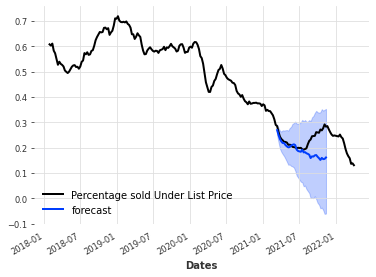

In [25]:
seroes_below_list
train, val = seroes_below_list[:-56], seroes_below_list[-56:]

model = ExponentialSmoothing()
model.fit(train)
pred = model.predict(n=36, num_samples=500)

seroes_below_list.plot()
pred.plot(label='forecast')
plt.plot()
# print(pred.plot(label='forecast'))
# fig = seroes_below_list.plot()
plt.savefig("test3")
plt.show()

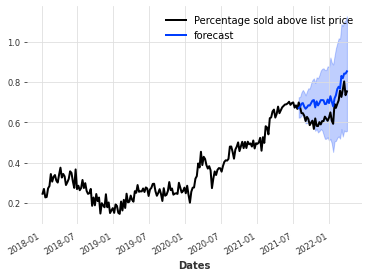

In [9]:
train, val = series_above_list[:-36], series_above_list[-36:]

model = ExponentialSmoothing()
model.fit(train)
pred = model.predict(n=36, num_samples=500)

series_above_list.plot()
pred.plot(label='forecast')

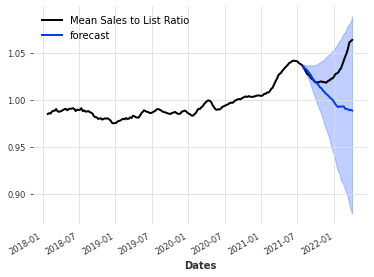

In [10]:
train, val = series_mean_selling[:-36], series_mean_selling[-36:]

model = ExponentialSmoothing()
model.fit(train)
pred = model.predict(n=36, num_samples=500)

series_mean_selling.plot()
pred.plot(label='forecast')

In [11]:
train, val = series_mean_close_days[:-36], series_mean_close_days[-36:]

model = ExponentialSmoothing()
model.fit(train)
pred = model.predict(n=36, num_samples=500)

series_mean_close_days.plot()
pred.plot(label='forecast')

C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\exponential_smoothing\initialization.py:96: RuntimeWarning: Mean of empty slice
  tmp.reshape(k_cycles, seasonal_periods).T, axis=1)


ValueError: shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)